# The zoologist

The zoologist is an expert at recognizing penguin species. Here are 3 species of penguin that our specialist is able to name:

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/palmer-penguins.png" width=1000>

Are you able to differentiate them?

## The task

As we know nothing about penguins, let's use a Machine Learning algorithm to help us classify these penguins based on their characteristics.

## Load the dataset

Let's load the seaborn's [Penguins dataset](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv) and store it in a DataFrame getting rid of the `nans` to make things easy! You should get:

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/penguin-df.png' width=600>

In [7]:
import seaborn as sns
import pandas as pd

# Load the penguin dataset
penguin_df = sns.load_dataset('penguins')
penguin_df.dropna(inplace=True)

# Display the 5 first iris
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


❓What are the characteristics of the penguins

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/gentoo.png' width=700>

❓How many species of penguin are there in this dataset?

In [9]:
penguin_df['species'].nunique()

3

❓How many observations for each species are there in the dataset?

In [10]:
penguin_df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

## Data visualization

Plot the `'bill_length_mm'` against the `'bill_depth_mm'` with a different color for each species:

In [2]:
# YOUR CODE HERE

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

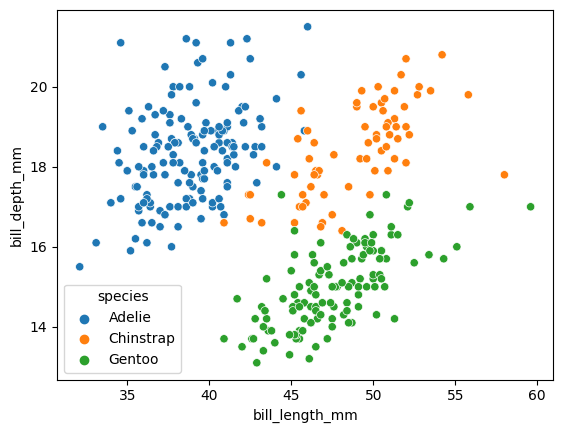

In [13]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguin_df, hue="species" )

❓Are you able to differentiate these species based on your observations?

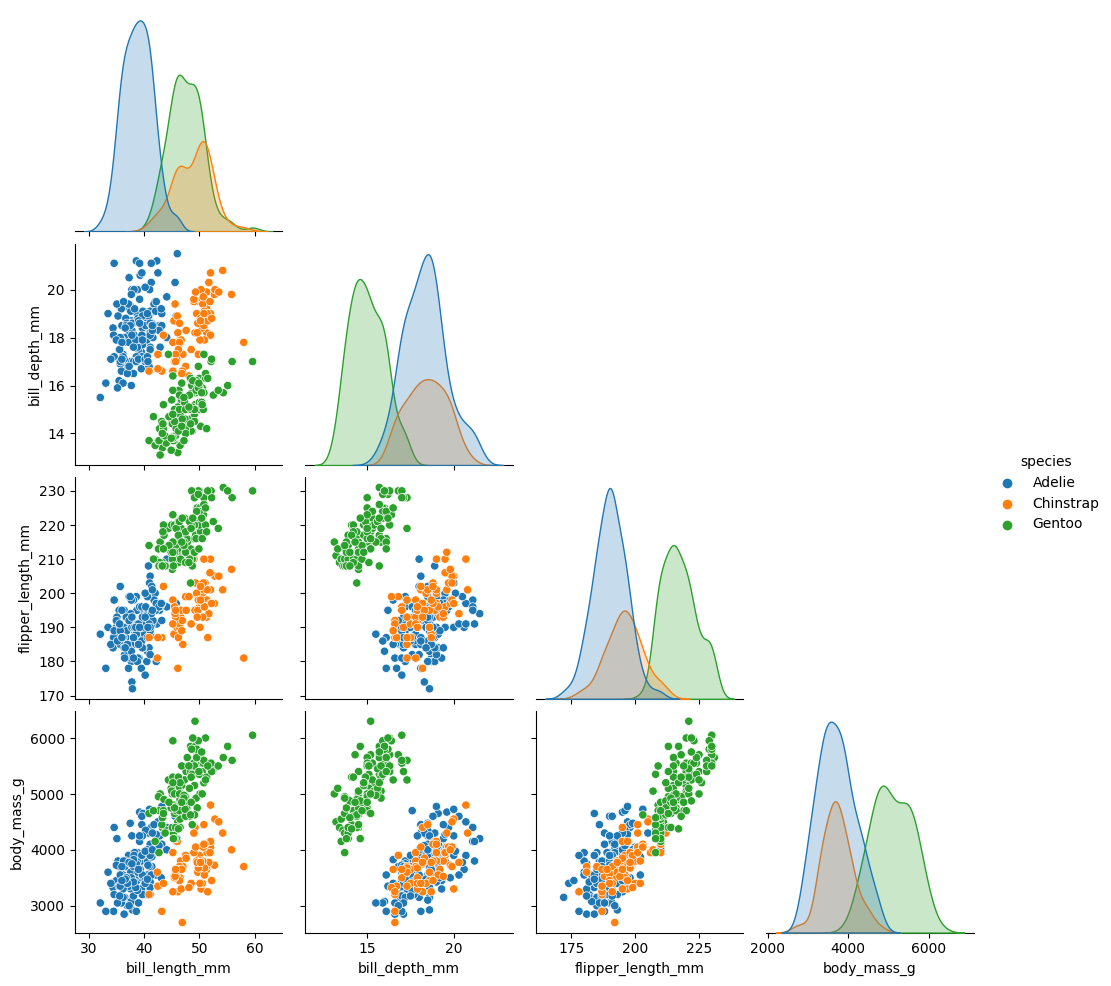

In [14]:
sns.pairplot(penguin_df, hue="species", corner=True)

The **gentoo** species seems to have clearly longer flippers than the other 2 species.

## Modeling

There are two strategies to tackle the multiclass problem:

- One vs One
- One vs All (One vs Rest)

### One vs One
- Train **a model for each pair of classes** within the dataset
- At prediction time, the class which received the most votes is selected

<img src='images/ovo_multiclass.png' width=500 style='margin:auto'> 


👍Considers pair-specific differences


👎Creates a large number of sub models. Computationally expensive


### One vs Rest (One vs All)

- Train **one model per class** against all others combined
- At prediction time, the class with the highest probability is selected

<img src='images/ova_multiclass.png' width=500 style='margin:auto'> 

👍Less computationally expensive


👎Loses pair-specific differences that get diluted in a combination of classes


## One Vs Rest

👇 Evaluate a model that predicts the penguin species according to it **numerical** features. Implement a One vs Rest multiclass strategy by tweaking the right parameter of `LogisticRegression`. Evaluate it by cross-validation and record the time it takes to do so.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import LabelEncoder

X = penguin_df.drop(columns = ["species", "island", "sex"])
y = penguin_df['species']

ovr_log_model = LogisticRegression(multi_class='ovr', max_iter=1000)
# cross_validate should use a cv = KFold() with shuffling since it doesn't shuffle by default!
ovr_cv_results = cross_validate(ovr_log_model, X, y, cv = KFold(shuffle = True, random_state=42))

ovr_cv_results

{'fit_time': array([0.11960292, 0.07639503, 0.07003999, 0.08858895, 0.06997895]),
 'score_time': array([0.00363922, 0.00234413, 0.00310612, 0.00244999, 0.00223422]),
 'test_score': array([0.98507463, 0.97014925, 1.        , 1.        , 0.98484848])}

In [17]:
ovr_cv_results['fit_time'].sum() + ovr_cv_results['score_time'].sum()

0.43837952613830566

## One Vs One

👇 This time, implement a `OneVsOneClassifier`. There is no parameter to directly specify a OvO multiclass strategy in `LogisticRegression`. You'll need to find an alternative way to do so 😉

Again, Evaluate by cross-validation and record the time it takes to do so.

In [5]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.utils import shuffle

In [21]:
ovo_log_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))

cv_results = cross_validate(ovo_log_model,X, y, cv = KFold(shuffle = True, random_state=42))

cv_results

{'fit_time': array([0.10390711, 0.07762384, 0.06187177, 0.06234789, 0.06356716]),
 'score_time': array([0.00351882, 0.00311899, 0.00346708, 0.00351119, 0.00614882]),
 'test_score': array([0.98507463, 0.97014925, 0.98507463, 0.98484848, 0.98484848])}

In [23]:
cv_results['fit_time'].sum() + cv_results['score_time'].sum()

0.389082670211792

ℹ️ We notice that both models have very similar accuracies. Why? <br> <br>First, both models are doing a very good job on a dataset that is reasonably easy to classify! Secondly, in the instance of having just three classes to distinguish between, both OvO models and OvR models actually result in 3 sub-models being fitted! Thus we would expect to give very similar accuracy. 

❓The zoologist is able to find the right species 9 times over 10, can you beat him?

<details>
<summary> 👉Solution </summary>
You should get a mean accuracy of around 98% which is more than 90%. So our algorithm beats the zoologist!

</details>

# 🏁 